In [19]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

location = "D:\\AWA\\phase_space_tomography_07_07_22" \
         "\\Quadscan_data_matching_solenoid_180A"
base_fname = location + "\\DQ7_scan1_"

# generate list of filenames for processing
vals = np.arange(-84,84,8)
vals[0] = -83
vals[-1] = 83

fnames = [f"{base_fname}{ele:+}.h5".replace("+", "p").replace("-", "n") for ele in vals]
print(fnames)

['D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n83.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n76.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n68.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n60.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n52.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n44.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n36.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n28.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n20.h5', 'D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A\\DQ7_scan1_n12.h5',

In [20]:
from scipy import ndimage

all_images = []
all_charges = []
for fname in fnames:
    w = 450
    images = []
    charges = []
    print(fname)
    with h5py.File(fname,"r") as f:
        screen_center = f.attrs["screen_center"].reshape(1,-1)
        #print(dict(f.attrs))

        for i in range(2):#f.attrs["nframes"]-1):
            bbox = np.vstack([screen_center - w, screen_center + w]).T
            slices = [slice(*ele.astype(int)) for ele in bbox]
            im = f[f"{i}"]["raw"][slices[1],slices[0]]
            images.append(im)
            charges.append(f[f"{i}"].attrs["charge"])

    all_images.append(images)
    all_charges.append(charges)


D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n83.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n76.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n68.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n60.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n52.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n44.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n36.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n28.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n20.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid_180A\DQ7_scan1_n12.h5
D:\AWA\phase_space_tomography_07_07_22\Quadscan_data_matching_solenoid

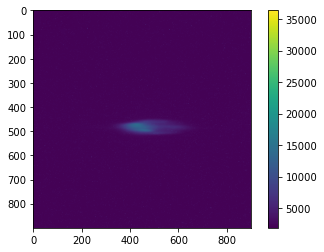

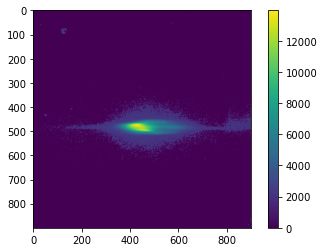

In [21]:
from skimage import filters

all_images = np.array(all_images)
thresh = filters.threshold_triangle(all_images[0,0])
t_images = np.where(all_images > thresh, all_images, 0)


def apply_filter(X):
    return ndimage.minimum_filter(X, size=3)

filtered_images = np.empty_like(t_images)
#filtered_images[0, 0] = apply_filter(t_images[0, 0])
#thresh = filters.threshold_triangle(filtered_images[0,0])

for ii in range(t_images.shape[0]):
    for jj in range(t_images.shape[1]):
        filtered_images[ii, jj] = apply_filter(t_images[ii, jj])
        #filtered_images[ii, jj] = np.where(
        #    filtered_images[ii, jj] > thresh*1.05, filtered_images[ii, jj],0
        #)

plt.imshow(all_images[1,1])
plt.colorbar()
plt.figure()
plt.imshow(filtered_images[1,1])
plt.colorbar()


In [22]:
all_images.shape

(21, 2, 900, 900)

In [23]:
#for ii in range(all_images.shape[0]):
#    for jj in range(2):
#        plt.figure()
#        plt.imshow(all_images[ii,jj])
#        plt.savefig(f"{location}\\images\\{ii}_{jj}.png")
#        plt.close()

(array([7., 2., 3., 9., 7., 7., 5., 1., 0., 1.]),
 array([0.66509253, 0.72094402, 0.7767955 , 0.83264699, 0.88849847,
        0.94434996, 1.00020145, 1.05605293, 1.11190442, 1.1677559 ,
        1.22360739]),
 <BarContainer object of 10 artists>)

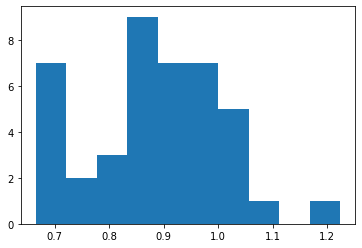

In [24]:
all_charges = np.array(all_charges)*1e9
plt.hist(all_charges.flatten())

(21, 2, 1)
(21, 2, 900, 900)


(array([7., 2., 3., 9., 7., 7., 5., 1., 0., 1.]),
 array([0.66509253, 0.72094402, 0.7767955 , 0.83264699, 0.88849847,
        0.94434996, 1.00020145, 1.05605293, 1.11190442, 1.1677559 ,
        1.22360739]),
 <BarContainer object of 10 artists>)

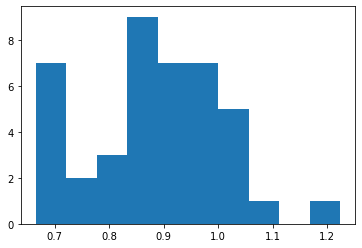

In [25]:
# select 10 best images based on how close they are to the target charge of 0.9 nC
target_charge = 0.9
charge_diff = np.abs(all_charges - target_charge)

# argsort based on differences
sorted_diff_args = np.argsort(charge_diff, axis=1).squeeze()

sorted_charges = np.empty_like(all_charges)
sorted_images = np.empty_like(all_images)
for i in range(len(all_charges)):
    sorted_charges[i] = all_charges[i][sorted_diff_args[i]]
    sorted_images[i] = sorted_images[i][sorted_diff_args[i]]

train_charges = sorted_charges[:, :10]
train_images = sorted_images[:, :10]
print(train_charges.shape)
print(train_images.shape)

plt.hist(train_charges.flatten())

In [26]:
all_vals = np.repeat(vals.reshape(1,-1), 10, 0).T

In [27]:
px_coords = np.arange(np.array(all_images).shape[-1]) - np.array(all_images).shape[-1]/2

In [2]:
# test function
from image_processing import import_images, process_images
location = (
    "D:\\AWA\\phase_space_tomography_07_07_22\\Quadscan_data_matching_solenoid_180A"
    "\\data_files"
)
base_fname = location + "\\DQ7_scan1_"
process_images(base_fname, 10, downsample=5, threshold_multiplier=1.25)
all_k, all_images, _, _ = import_images()

C:\ProgramData\Miniconda3\envs\phase_space_reconstruction\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
all_images.shape

(21, 10, 180, 180)

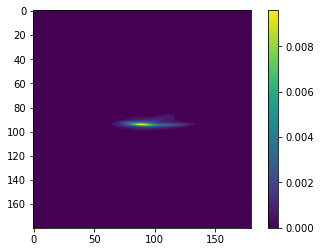

In [4]:
import matplotlib.pyplot as plt
plt.imshow(all_images[4,0])
plt.colorbar()